### Problem : By performing EDA on the sample superstore dataset find the weak areas where you can work to make more profit
#### By Indrajith V

In [1]:
import numpy as  np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg
wg.filterwarnings('ignore')

In [2]:
df1 = pd.read_csv('SampleSuperstore_task3.csv')
df1

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,Second Class,Consumer,United States,Miami,Florida,33180,South,Furniture,Furnishings,25.2480,3,0.20,4.1028
9990,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Furniture,Furnishings,91.9600,2,0.00,15.6332
9991,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Technology,Phones,258.5760,2,0.20,19.3932
9992,Standard Class,Consumer,United States,Costa Mesa,California,92627,West,Office Supplies,Paper,29.6000,4,0.00,13.3200


In [3]:
df1.shape

(9994, 13)

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [5]:
df1.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [6]:
df1.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [7]:
df1.duplicated().sum()

17

In [8]:
df = df1.drop_duplicates()
df.duplicated().sum()

0

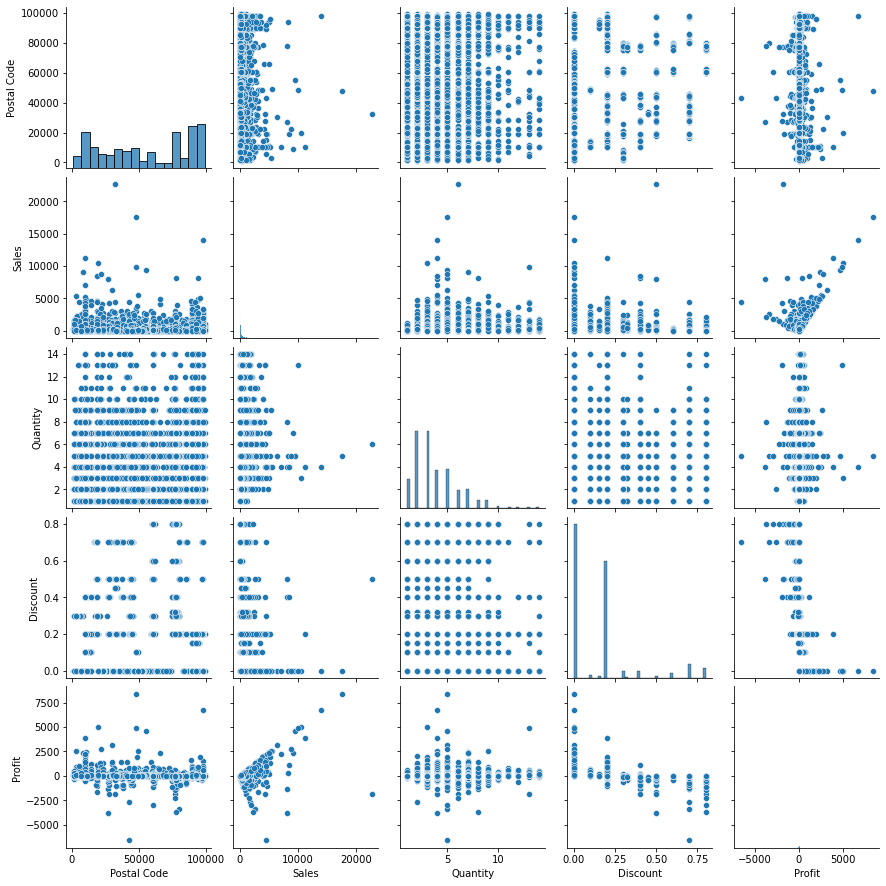

In [9]:
sns.pairplot(df)


- There is very less profit as compared to the sales that happen in there


<AxesSubplot:>

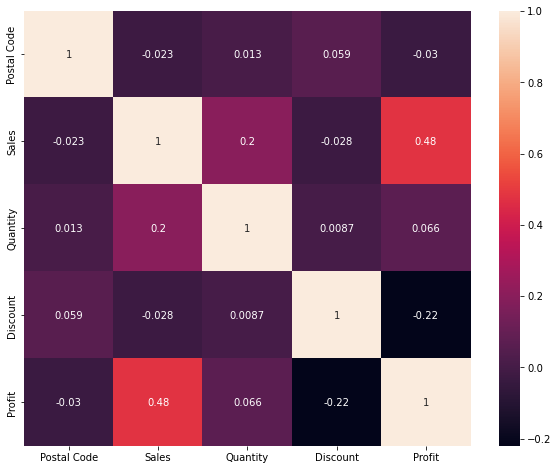

In [12]:
df.corr()
plt.figure(figsize =(10,8))
sns.heatmap(df.corr(),annot = True)

- There is a negative correlation between profit - discount

#### Univariate  Analysis

<AxesSubplot:xlabel='Ship Mode', ylabel='count'>

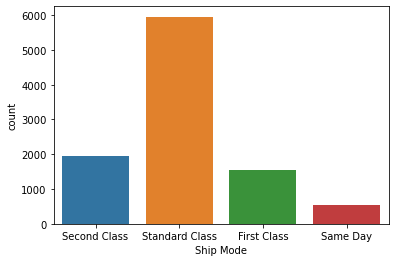

In [13]:
sns.countplot(df['Ship Mode'])

<AxesSubplot:xlabel='Region', ylabel='count'>

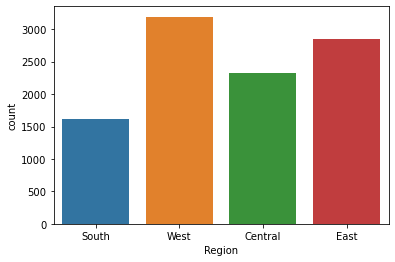

In [14]:
sns.countplot(df['Region'])

<AxesSubplot:xlabel='Category', ylabel='count'>

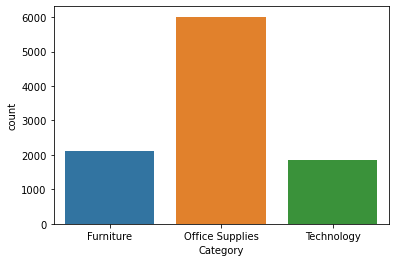

In [15]:
sns.countplot(df['Category'])

<AxesSubplot:ylabel='Category'>

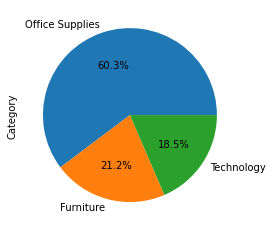

In [16]:
df['Category'].value_counts().plot(kind ='pie',autopct="%1.1f%%")

- Here 60.3% of category contain office supplies -
- Here 21.2% of category contain furnitures -
- Here 18.5% of category contain technology   -

<AxesSubplot:ylabel='Ship Mode'>

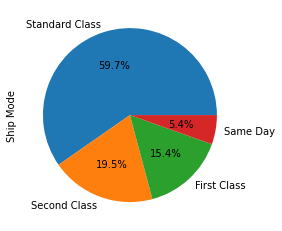

In [17]:
df['Ship Mode'].value_counts().plot(kind ='pie',autopct="%1.1f%%")

<AxesSubplot:xlabel='Sales'>

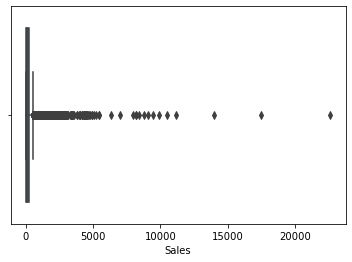

In [18]:
sns.boxplot(df['Sales'])

#### Bivariate Analysis

#### Neumerical - Neumerical

Text(0, 0.5, 'profit')

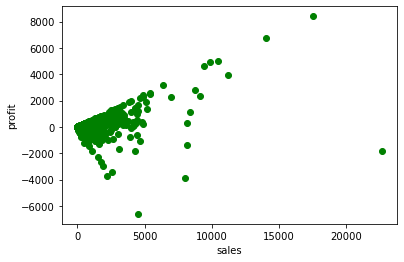

In [19]:
import seaborn as sns
plt.scatter(df['Sales'],df['Profit'],color = 'green')
plt.xlabel('sales')
plt.ylabel('profit')


   #### Neumerical - Categorical

<AxesSubplot:xlabel='Sales', ylabel='Ship Mode'>

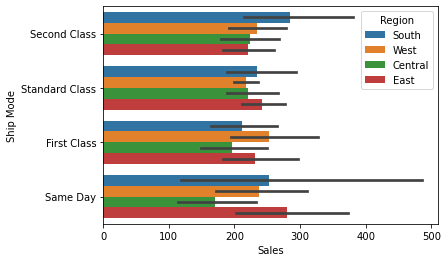

In [20]:
sns.barplot(df['Sales'],df['Ship Mode'],hue = df['Region'])

In [21]:
df.pivot_table(values = 'Profit',columns = 'Ship Mode',index = 'Region') 

Ship Mode,First Class,Same Day,Second Class,Standard Class
Region,,,,
Central,12.386186,12.765664,19.657483,17.614363
East,32.106151,51.485594,20.353379,34.135771
South,29.454638,-21.232952,44.580994,27.671697
West,43.957618,44.141713,36.888939,29.188056


In [22]:
df.groupby('Ship Mode').mean()['Profit']

Ship Mode
First Class       31.850134
Same Day          29.283924
Second Class      29.565956
Standard Class    27.534715
Name: Profit, dtype: float64

Text(0, 0.5, 'Profit')

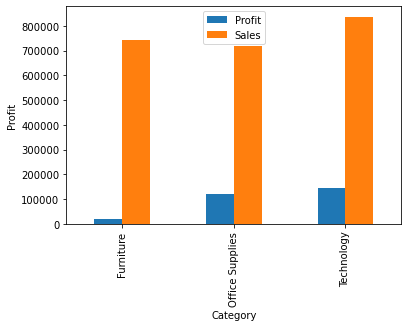

In [23]:
df.groupby('Category')['Profit','Sales'].sum().plot.bar()
plt.ylabel('Profit')

 -  Furnitures,office supplies and technology has good number of sales -
 -   But there is not much profit according to the sales -
 -   Furnitures produces a very less profit as compared to office supplies and technology -

Text(0.5, 1.0, ' Sales in the Sub-Category')

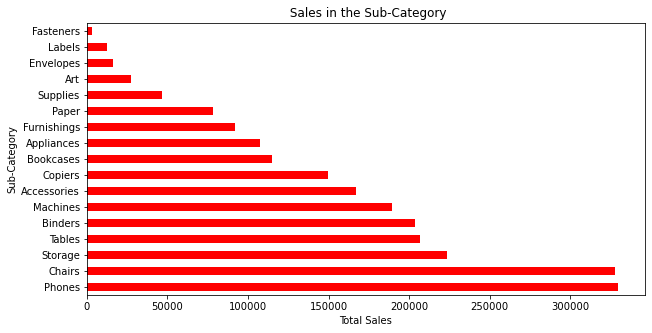

In [24]:
high_sales_subcategory = df.groupby("Sub-Category").Sales.sum().nlargest(n = 100)
high_sales_subcategory.plot(kind = 'barh',figsize = (10,5),color = 'red')
plt.xlabel('Total Sales')
plt.ylabel('Sub-Category')
plt.title(" Sales in the Sub-Category")

- There is  good number of sales in chairs and phones 
- Fasteners has very less sales


<AxesSubplot:title={'center':'Profit in the Sub-Category'}, xlabel='Profit', ylabel='Sub-Category'>

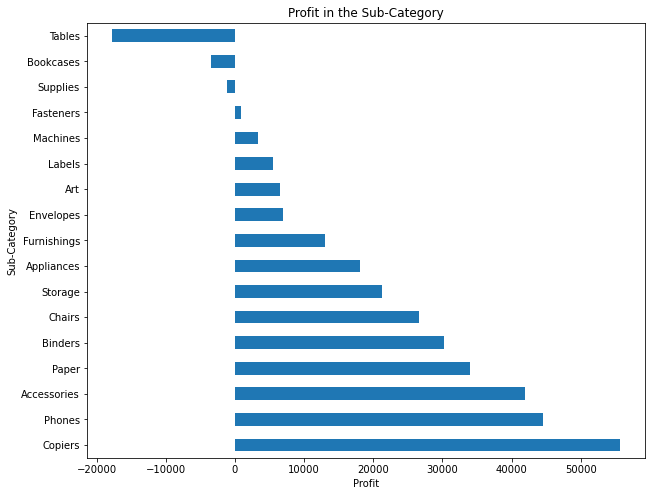

In [25]:
plt.figure(figsize=(10,8))
statewise = df.groupby(['Sub-Category'])['Profit'].sum().nlargest(50)
plt.title('Profit in the Sub-Category',)
plt.xlabel('Profit')
statewise.plot.barh()

- Tables,bookcases,supplies makes loss for the company
- Copiers,phones,accessories makes good profit

<AxesSubplot:xlabel='Discount', ylabel='Profit'>

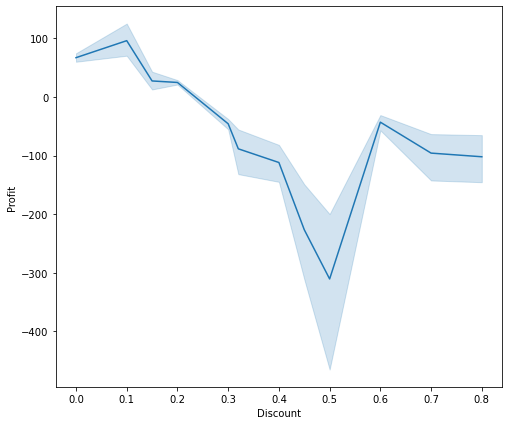

In [26]:
plt.figure(figsize=(8,7))
sns.lineplot(df['Discount'],df['Profit'])

- From the line plot we can find that discount is inversely affecting the profit

<AxesSubplot:ylabel='Region'>

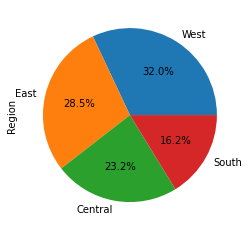

In [27]:
df['Region'].value_counts().plot(kind ='pie',autopct="%1.1f%%")

Text(0.5, 1.0, 'Sales vs profit in top 10 states')

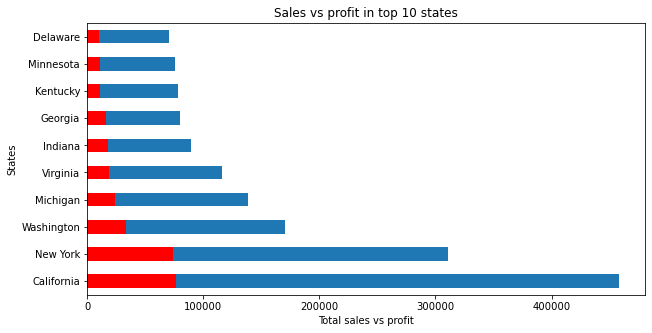

In [28]:
high_sales_state = df.groupby("State").Sales.sum().nlargest(n=10)
high_profit_state = df.groupby("State").Profit.sum().nlargest(n = 10)
high_sales_state.plot(kind = 'barh',figsize = (10,5))
high_profit_state.plot(kind = 'barh',figsize = (10,5),color = 'red')
plt.xlabel('Total sales vs profit',)
plt.ylabel('States',)
plt.title("Sales vs profit in top 10 states")


- Most of the sales at california 
- NewYork has also good number of sales
- In the case of profit both California and Newyork genarates approximately equal profit

Text(0.5, 1.0, 'Sales,Profits and Discounts')

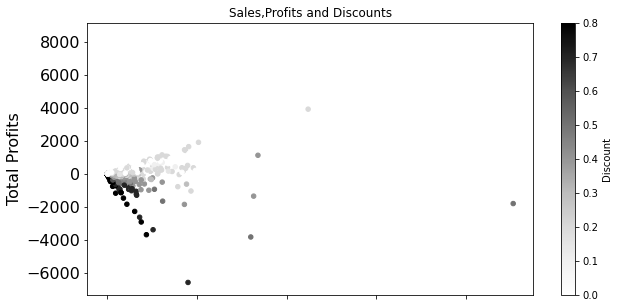

In [29]:
df.plot(kind = "scatter",figsize = (10,5), x = "Sales", y= "Profit", c = "Discount", s = 20,fontsize = 16)
plt.ylabel('Total Profits',fontsize = 16)
plt.title("Sales,Profits and Discounts")

- discount doesnot genarate profit
- Increase in the sales makes more profit

#### Conclusions

- Increase the sales and decrease the discounts at states like 'New York' and 'California' to make more profits.
- Reduce the sales of tables and book cases in the sub category because it makes loss to the company.
- Increase the sales in the technology and office suppliers and reduce the sales of furnitures
- Increase the sales of copiers,phones and accessories in the sub categories for more profit
- Increase the sales in Western regions as well as Eastern regions
